# **<span style="color: RED;">THỰC HÀNH 3: BIẾN ĐỔI HÌNH HỌC</span>**

## **<span style="color: RED;">1. VIẾT CHƯƠNG TRÌNH BIẾN ĐỔI ẢNH</span>**

### 1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


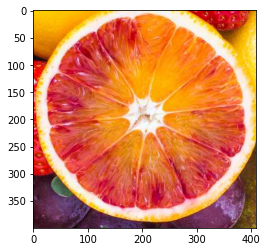

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()


#### 1.2 Tịnh tiến đơn

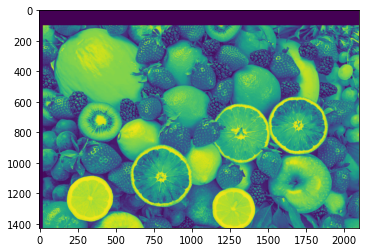

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode = "F")
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()


#### 1.3 Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


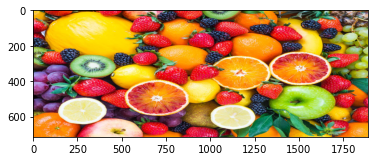

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()


#### 1.4 Xoay ảnh

(1427, 2100, 3)


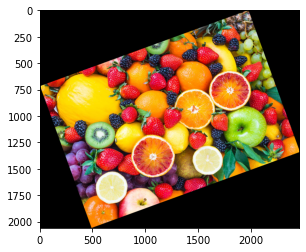

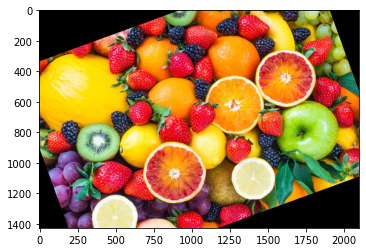

In [6]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()


#### 1.5 Dilation và Erosion

(309, 515)


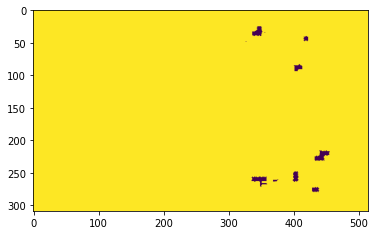

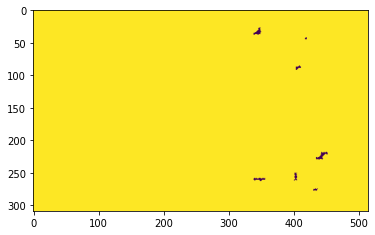

In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode ='F')
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()


#### 1.6 Coordinate Mapping

(309, 515)


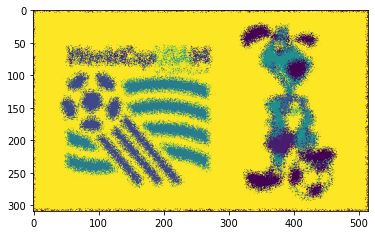

In [9]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg', mode="F")
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.rand(*M.shape) - d
mp = (M + q).astype(int)
d1 = nd.map_coordinates(data, mp)
plt.imshow(d1)
plt.show()


#### 1.7 Biến đổi chung (Generic Transformation)

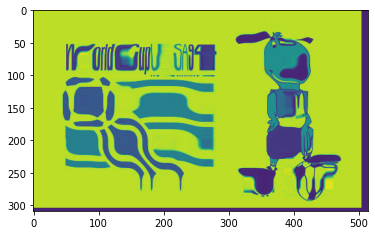

In [10]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode = "F")

d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()


## **<span style="color: RED;">2. BÀI TẬP</span>**

    Bài 1. Chọn ảnh quả kiwi bất kì. Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới. Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin. Lưu ảnh kết quả vào file kiwi_wave.jpg

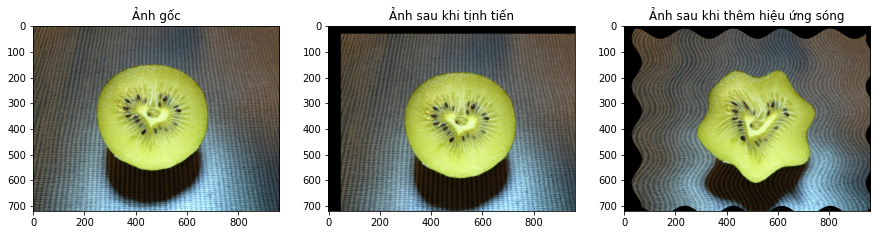

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Đọc ảnh
data = iio.imread('kiwi.jpg')

# Tịnh tiến ảnh sang phải 50px và xuống dưới 30px
shifted = nd.shift(data, (30, 50, 0))

# Tạo lưới tọa độ
x, y = np.meshgrid(np.arange(shifted.shape[1]), np.arange(shifted.shape[0]))

# Tạo hiệu ứng sóng bằng hàm sin
x_wave = x + 20 * np.sin(y/30)
y_wave = y + 20 * np.sin(x/30)

# Áp dụng biến đổi tọa độ
coords = np.array([y_wave, x_wave])
wave_effect = np.zeros_like(shifted)
for i in range(3):  # Áp dụng cho từng kênh màu
    wave_effect[:,:,i] = nd.map_coordinates(shifted[:,:,i], coords)

# Lưu ảnh kết quả
iio.imsave('kiwi_wave.jpg', wave_effect.astype(np.uint8))

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

# Hiển thị ảnh gốc
plt.subplot(131)
plt.imshow(data)
plt.title('Ảnh gốc')

# Hiển thị ảnh sau khi tịnh tiến
plt.subplot(132)
plt.imshow(shifted)
plt.title('Ảnh sau khi tịnh tiến')

# Hiển thị ảnh sau khi thêm hiệu ứng sóng
plt.subplot(133)
plt.imshow(wave_effect)
plt.title('Ảnh sau khi thêm hiệu ứng sóng')

plt.show()

    Bài 2: Chọn quả đu đủ và dưa hấu từ google. Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím. Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

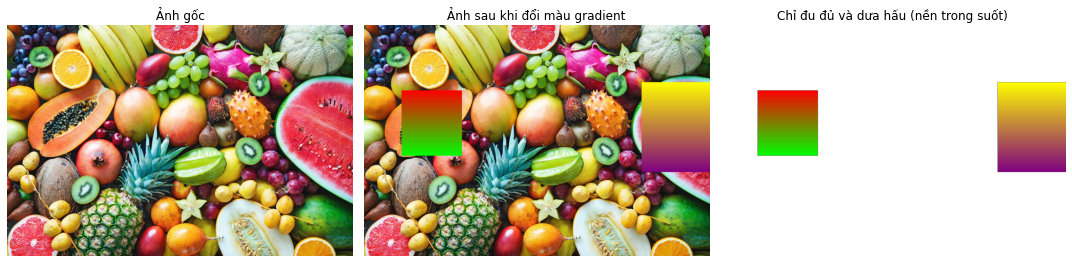

Đã lưu file 'papaya_watermelon_transparent.png' với nền trong suốt!


In [10]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from PIL import Image

# Đọc ảnh gốc
img = iio.imread('exercise/colorful-ripe-tropical-fruits.jpg')

# Tạo bản sao của ảnh gốc
result = img.copy()

# Tạo gradient màu cho đu đủ (từ đỏ sang xanh lá)
def create_gradient_red_to_green(height, width):
    gradient = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        ratio = i / (height - 1)  # Tỷ lệ từ 0 đến 1
        # Từ đỏ (255,0,0) sang xanh lá (0,255,0)
        gradient[i, :, 0] = int(255 * (1 - ratio))  # Red giảm dần
        gradient[i, :, 1] = int(255 * ratio)        # Green tăng dần
        gradient[i, :, 2] = 0                       # Blue = 0
    return gradient

# Tạo gradient màu cho dưa hấu (từ vàng sang tím)
def create_gradient_yellow_to_purple(height, width):
    gradient = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        ratio = i / (height - 1)  # Tỷ lệ từ 0 đến 1
        # Từ vàng (255,255,0) sang tím (128,0,128)
        gradient[i, :, 0] = int(255 * (1 - ratio) + 128 * ratio)  # Red
        gradient[i, :, 1] = int(255 * (1 - ratio))                # Green giảm dần
        gradient[i, :, 2] = int(128 * ratio)                      # Blue tăng dần
    return gradient

# Áp dụng gradient cho vùng đu đủ (giữ nguyên tọa độ)
papaya_region = result[400:800, 230:600]
gradient_papaya = create_gradient_red_to_green(papaya_region.shape[0], papaya_region.shape[1])
result[400:800, 230:600] = gradient_papaya

# Áp dụng gradient cho vùng dưa hấu (giữ nguyên tọa độ)
watermelon_region = result[350:900, 1700:2200]
gradient_watermelon = create_gradient_yellow_to_purple(watermelon_region.shape[0], watermelon_region.shape[1])
result[350:900, 1700:2200] = gradient_watermelon

# Tạo nền trong suốt cho những vùng không phải đu đủ và dưa hấu
transparent_bg = np.zeros_like(result)
transparent_alpha = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Chỉ giữ lại đu đủ và dưa hấu, phần còn lại trong suốt
transparent_bg[400:800, 230:600] = gradient_papaya
transparent_bg[350:900, 1700:2200] = gradient_watermelon

# Thiết lập alpha channel (255 = không trong suốt, 0 = hoàn toàn trong suốt)
transparent_alpha[400:800, 230:600] = 255  # Đu đủ không trong suốt
transparent_alpha[350:900, 1700:2200] = 255  # Dưa hấu không trong suốt

# Kết hợp RGB với alpha channel để tạo RGBA
result_rgba = np.dstack([transparent_bg, transparent_alpha])

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

# Hiển thị ảnh gốc
plt.subplot(131)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

# Hiển thị ảnh sau khi đổi màu (trên nền gốc)
plt.subplot(132)
plt.imshow(result)
plt.title('Ảnh sau khi đổi màu gradient')
plt.axis('off')

# Hiển thị chỉ đu đủ và dưa hấu trên nền trong suốt
plt.subplot(133)
plt.imshow(result_rgba)
plt.title('Chỉ đu đủ và dưa hấu (nền trong suốt)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Lưu file PNG với alpha channel
pil_image = Image.fromarray(result_rgba, 'RGBA')
pil_image.save('papaya_watermelon_transparent.png')

print("Đã lưu file 'papaya_watermelon_transparent.png' với nền trong suốt!")


    Bài 3: Chọn ảnh núi và thuyền. Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False). Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay. Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

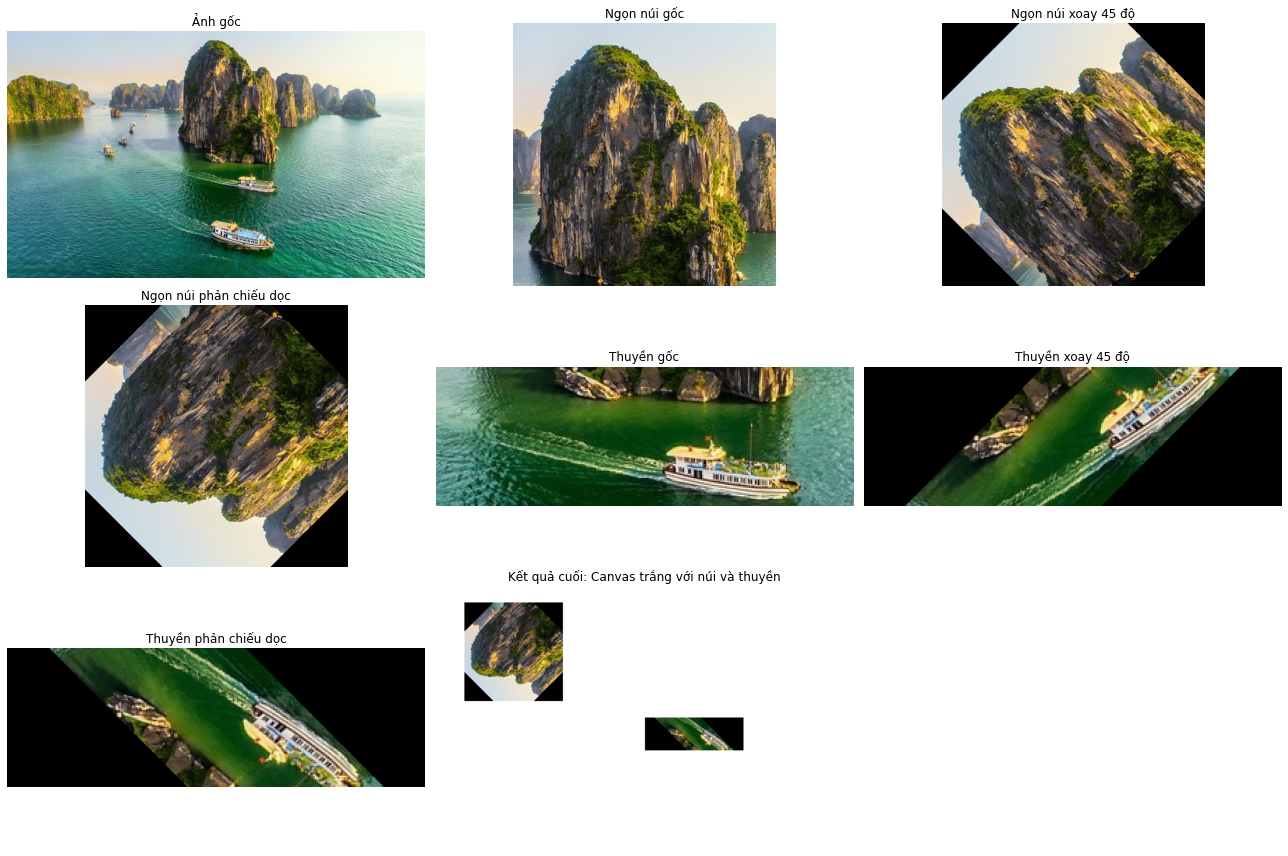

Đã lưu file 'outputbai3/mountain_boat_mirror.jpg' thành công!
Kích thước ngọn núi: (300, 300, 3)
Kích thước thuyền: (100, 300, 3)
Kích thước canvas: (800, 1200, 3)


In [8]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

# Đọc ảnh gốc
img = iio.imread('exercise/quang_ninh.jpg')

# Chọn vùng chứa ngọn núi và xoay (thu hẹp lại) - giữ nguyên tọa độ
mountain = img[0:300, 400:700]
mountain_rotated = nd.rotate(mountain, 45, reshape=False)  # reshape=False để giữ nguyên kích thước

# Chọn vùng chứa thuyền và xoay (di chuyển lên trên để tránh sóng nước) - giữ nguyên tọa độ
boat = img[300:400, 400:700]
boat_rotated = nd.rotate(boat, 45, reshape=False)  # reshape=False để giữ nguyên kích thước

# Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng
mountain_mirrored = np.flipud(mountain_rotated)  # flip theo trục dọc
boat_mirrored = np.flipud(boat_rotated)  # flip theo trục dọc

# Tạo canvas trắng để ghép các đối tượng
canvas_height = 800
canvas_width = 1200
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255  # Canvas trắng

# Ghép ngọn núi vào canvas (ở vị trí trên bên trái)
mountain_h, mountain_w = mountain_mirrored.shape[:2]
canvas[50:50+mountain_h, 50:50+mountain_w] = mountain_mirrored

# Ghép thuyền vào canvas (ở vị trí dưới bên phải)
boat_h, boat_w = boat_mirrored.shape[:2]
canvas[400:400+boat_h, 600:600+boat_w] = boat_mirrored

# Lưu kết quả
iio.imsave('mountain_boat_mirror.jpg', canvas)

# Hiển thị kết quả
plt.figure(figsize=(18, 12))

# Hiển thị ảnh gốc
plt.subplot(331)
plt.imshow(img)
plt.title('Ảnh gốc')
plt.axis('off')

# Hiển thị ngọn núi gốc
plt.subplot(332)
plt.imshow(mountain)
plt.title('Ngọn núi gốc')
plt.axis('off')

# Hiển thị ngọn núi sau xoay
plt.subplot(333)
plt.imshow(mountain_rotated)
plt.title('Ngọn núi xoay 45 độ')
plt.axis('off')

# Hiển thị ngọn núi sau phản chiếu
plt.subplot(334)
plt.imshow(mountain_mirrored)
plt.title('Ngọn núi phản chiếu dọc')
plt.axis('off')

# Hiển thị thuyền gốc
plt.subplot(335)
plt.imshow(boat)
plt.title('Thuyền gốc')
plt.axis('off')

# Hiển thị thuyền sau xoay
plt.subplot(336)
plt.imshow(boat_rotated)
plt.title('Thuyền xoay 45 độ')
plt.axis('off')

# Hiển thị thuyền sau phản chiếu
plt.subplot(337)
plt.imshow(boat_mirrored)
plt.title('Thuyền phản chiếu dọc')
plt.axis('off')

# Hiển thị kết quả cuối cùng
plt.subplot(338)
plt.imshow(canvas)
plt.title('Kết quả cuối: Canvas trắng với núi và thuyền')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Đã lưu file 'outputbai3/mountain_boat_mirror.jpg' thành công!")
print(f"Kích thước ngọn núi: {mountain_mirrored.shape}")
print(f"Kích thước thuyền: {boat_mirrored.shape}")
print(f"Kích thước canvas: {canvas.shape}")


    Bài 4: Chọn ngôi chùa bất kì. Phóng to ngôi chùa lên 5 lần. Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa. Lưu ảnh kết quả vào pagoda_warped.jpg.

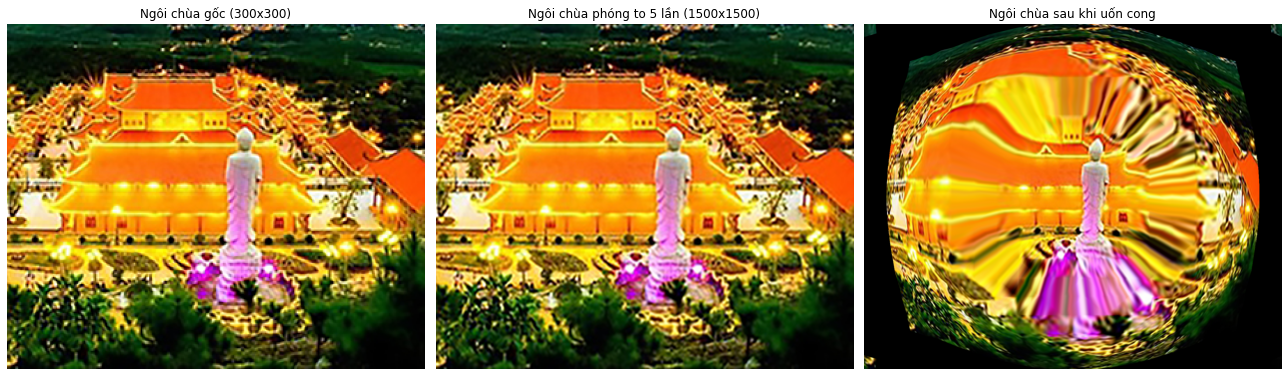

Đã lưu ảnh kết quả vào outputbai4/pagoda_warped.jpg


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.ndimage as nd
from skimage import transform as tf
import os

# Đọc ảnh gốc
img = np.array(Image.open('exercise/pagoda.jpg'))

# Chọn vùng chứa ngôi chùa (tọa độ chính xác)
pagoda_region = img[100:400, 150:450]

# Phóng to ngôi chùa lên 5 lần
pagoda_zoomed = nd.zoom(pagoda_region, (5, 5, 1))

# Tạo hàm biến đổi hình học để uốn cong (warping)
rows, cols = pagoda_zoomed.shape[0], pagoda_zoomed.shape[1]

# Tạo lưới tọa độ gốc
src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 20)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# Tạo lưới tọa độ đích với hiệu ứng uốn cong dạng "bong bóng"
center_col, center_row = cols / 2, rows / 2
dst_rows = src[:, 1].copy()
dst_cols = src[:, 0].copy()

for i in range(len(src)):
    dx = src[i, 0] - center_col
    dy = src[i, 1] - center_row
    dist = np.sqrt(dx**2 + dy**2)
    factor = 1 + 0.3 * np.sin(dist * 0.01)
    dst_cols[i] = center_col + dx * factor
    dst_rows[i] = center_row + dy * factor

dst = np.vstack([dst_cols, dst_rows]).T

# Áp dụng biến đổi hình học
tform = tf.PiecewiseAffineTransform()
tform.estimate(src, dst)
pagoda_warped = tf.warp(pagoda_zoomed / 255.0, tform, output_shape=(rows, cols))
pagoda_warped = (pagoda_warped * 255).astype(np.uint8)

# Hiển thị ảnh gốc, ảnh phóng to và ảnh uốn cong
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(pagoda_region)
plt.title('Ngôi chùa gốc (300x300)')
plt.axis('off')

plt.subplot(132)
plt.imshow(pagoda_zoomed)
plt.title('Ngôi chùa phóng to 5 lần (1500x1500)')
plt.axis('off')

plt.subplot(133)
plt.imshow(pagoda_warped)
plt.title('Ngôi chùa sau khi uốn cong')
plt.axis('off')

plt.tight_layout()
plt.show()

# Tạo thư mục nếu chưa có
os.makedirs('outputbai4', exist_ok=True)
Image.fromarray(pagoda_warped).save('outputbai4/pagoda_warped.jpg')
print("Đã lưu ảnh kết quả vào outputbai4/pagoda_warped.jpg")


    Bài 5: Viết chương trình tạo menu
    - Tịnh tiến
    - Xoay
    - Phóng to
    - Thu nhỏ
    - Coordinate Map
    Khi chọn phím T, X, P, H, C thì hỏi muốn thực hiện trên hình nào từ 3 hình trong thư mục exercise. Người dùng chọn hình nào thì thực hiện phép biến đổi trên hình đó.

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

# Danh sách các ảnh trong thư mục exercise
images = [
    'colorful-ripe-tropical-fruits.jpg',
    'quang_ninh.jpg',
    'pagoda.jpg'
]

# Hiển thị danh sách ảnh
print('Danh sách ảnh:')
for i, img_name in enumerate(images, 1):
    print(f'{i} - {img_name}')

# Hiển thị 3 ảnh gốc
plt.figure(figsize=(15, 5))
for i, img_name in enumerate(images, 1):
    plt.subplot(1, 3, i)
    img = iio.imread('exercise/' + img_name)
    plt.imshow(img)
    plt.title(f'{i} - {img_name}')
plt.tight_layout()
plt.show()

while True:
    print('\nMenu:')
    print('T - Tịnh tiến')
    print('X - Xoay')
    print('P - Phóng to')
    print('H - Thu nhỏ')
    print('C - Coordinate Map')
    print('Q - Thoát')
    
    choice = input('Chọn chức năng (T/X/P/H/C/Q): ').upper()
    
    if choice == 'Q':
        break
        
    if choice in ['T', 'X', 'P', 'H', 'C']:
        img_choice = int(input('Chọn số tương ứng với ảnh (1/2/3): '))
        if 1 <= img_choice <= 3:
            # Đọc ảnh được chọn
            img = iio.imread('exercise/' + images[img_choice-1])
            
            if choice == 'T':  # Tịnh tiến
                dx = int(input('Nhập số pixel dịch chuyển theo chiều ngang: '))
                dy = int(input('Nhập số pixel dịch chuyển theo chiều dọc: '))
                result = nd.shift(img, (dy, dx, 0))
                
            elif choice == 'X':  # Xoay
                angle = float(input('Nhập góc xoay (độ): '))
                result = nd.rotate(img, angle)
                
            elif choice == 'P':  # Phóng to
                scale = float(input('Nhập tỷ lệ phóng to (>1): '))
                result = nd.zoom(img, (scale, scale, 1))
                
            elif choice == 'H':  # Thu nhỏ
                scale = float(input('Nhập tỷ lệ thu nhỏ (0-1): '))
                result = nd.zoom(img, (scale, scale, 1))
                
            else:  # Coordinate Map
                d = 5
                V, H = img.shape[:2]
                coords = np.mgrid[0:V, 0:H]
                
                # Tạo hiệu ứng biến dạng ngẫu nhiên
                coords[0] = coords[0] + np.random.uniform(-d, d, (V, H))
                coords[1] = coords[1] + np.random.uniform(-d, d, (V, H))
                
                # Áp dụng biến đổi cho từng kênh màu
                result = np.zeros_like(img)
                for i in range(3):  # 3 kênh RGB
                    result[:,:,i] = nd.map_coordinates(img[:,:,i], coords)
            
            # Hiển thị kết quả
            plt.figure(figsize=(12, 5))
            plt.subplot(121)
            plt.imshow(img)
            plt.title('Ảnh gốc')
            
            plt.subplot(122)
            plt.imshow(result)
            plt.title('Kết quả')
            
            plt.show()
        else:
            print('Lựa chọn không hợp lệ!')
    else:
        print('Lựa chọn không hợp lệ!')
